Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    return pd.read_csv(file)

def exercise_1(df):
    column_names = []
    for column in df.columns:
        column_names.append(column)
    return column_names

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(n=k)

def exercise_4(df):
    unique = df['type'].unique()
    return unique.tolist()

def exercise_5(df):
    return df['nameDest'].value_counts().head(10)

def exercise_6(df):
    return df[(df['isFraud'] == 1) & pd.notna(df['isFraud'])]

def exercise_7(df):
    result = df.groupby('nameOrig')['nameDest'].nunique().reset_index()
    return result.sort_values(by='nameDest', ascending=False).reset_index(drop=True)

def visual_1(df):
    pass

def visual_2(df):
    pass

def exercise_custom(df):
    pass
    
def visual_custom(df):
    pass

In [2]:
df = exercise_0('transactions.csv')

In [3]:
# Test exercises here
# Exercise 1
print(exercise_1(df))

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [4]:
# Exercise 2
exercise_2(df,2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [5]:
# Exercise 3
exercise_3(df,2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
113464,11,CASH_OUT,368467.13,C589335932,50854.0,0.0,C330275881,52470.00,603456.58,0,0
192348,13,CASH_OUT,43004.24,C1793184626,0.0,0.0,C441730242,126486.88,34751.67,0,0


In [6]:
# Exercise 4
exercise_4(df)

['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

In [7]:
exercise_5(df)

nameDest
C985934102     84
C1286084959    80
C248609774     75
C1590550415    74
C2083562754    74
C665576141     72
C977993101     70
C1360767589    69
C451111351     66
C97730845      64
Name: count, dtype: int64

In [8]:
exercise_6(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
182862,13,CASH_OUT,408.00,C1894004688,408.00,0.0,C1293978242,898297.85,1075854.14,1,0
193765,13,TRANSFER,48375.02,C920803432,48375.02,0.0,C1767389067,0.00,0.00,1,0
193766,13,CASH_OUT,48375.02,C1894578299,48375.02,0.0,C590035788,374803.26,658520.33,1,0
196775,13,TRANSFER,4022667.54,C735463888,4022667.54,0.0,C1548348754,0.00,0.00,1,0


In [9]:
exercise_7(df)

,nameOrig,nameDest
0,C745009740,2
1,C260230637,2
2,C44568807,2
3,C1709295811,2
4,C361604284,1
...,...,...
199991,C1648185402,1
199992,C1648194899,1
199993,C1648216508,1
199994,C1648222711,1


Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

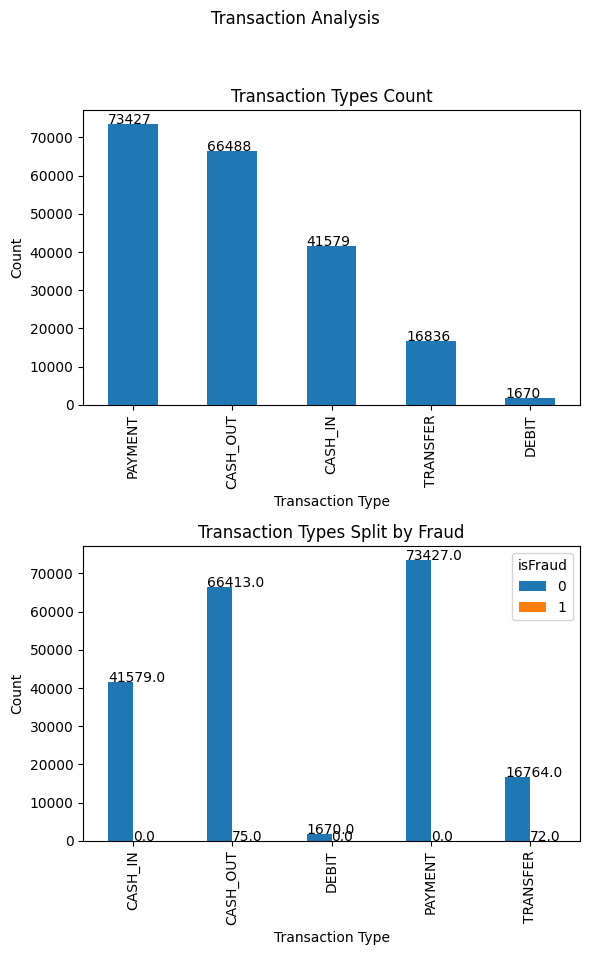

In [10]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    
    def transaction_counts_split_by_fraud(df):
        return df.groupby('type')['isFraud'].value_counts().unstack().fillna(0)

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction Types Count')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Count')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction Types Split by Fraud')
    axs[1].set_xlabel('Transaction Type')
    axs[1].set_ylabel('Count')
    fig.suptitle('Transaction Analysis')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return plt.show()

visual_1(df)


/tmp/ipykernel_43748/1157740792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_out_df['origin_balance_delta'] = -cash_out_df['amount']
/tmp/ipykernel_43748/1157740792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_out_df['dest_balance_delta'] = cash_out_df['amount']


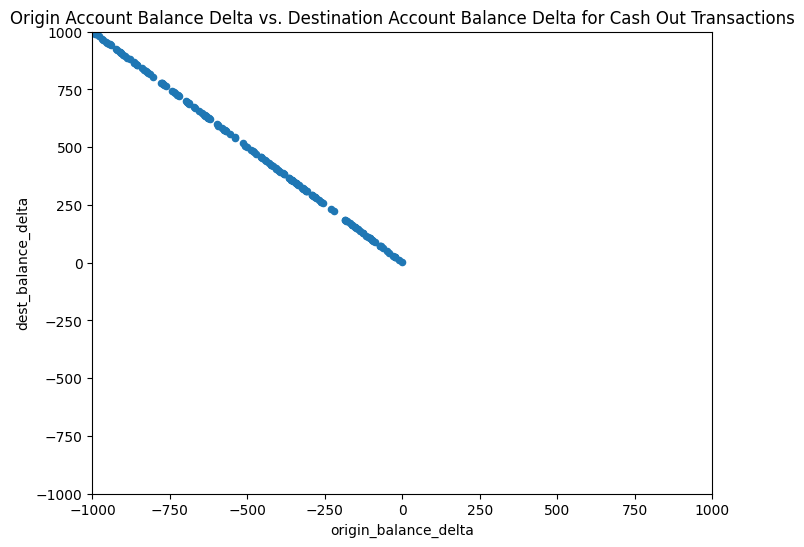

In [11]:
def visual_2(df):
    def query(df):
        cash_out_df = df[df['type'] == 'CASH_OUT']
        cash_out_df['origin_balance_delta'] = -cash_out_df['amount']
        cash_out_df['dest_balance_delta'] = cash_out_df['amount']
        
        return cash_out_df
    plot = query(df).plot.scatter(x='origin_balance_delta', y='dest_balance_delta', figsize=(8, 6))
    plot.set_title('Origin Account Balance Delta vs. Destination Account Balance Delta for Cash Out Transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return plt.show()

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

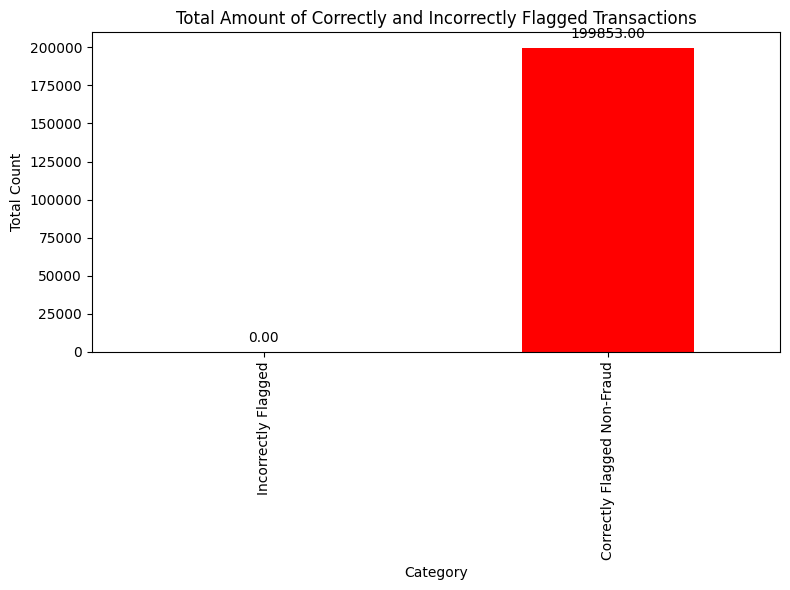

In [18]:
def exercise_custom(df):
    incorrectly_flagged = df[(df['isFraud'] == 0) & (df['isFlaggedFraud'] == 1)]
    correctly_flagged_non_fraud = df[(df['isFraud'] == 0) & (df['isFlaggedFraud'] == 0)]
    incorrectly_flagged_count = incorrectly_flagged.shape[0]
    correctly_flagged_non_fraud_count = correctly_flagged_non_fraud.shape[0]
    totals_df = pd.DataFrame({
        'Category': ['Incorrectly Flagged', 'Correctly Flagged Non-Fraud'],
        'Total Count': [incorrectly_flagged_count, correctly_flagged_non_fraud_count]
    })
    
    return totals_df
    
def visual_custom(df):
    totals_df = exercise_custom(df)
    plot = totals_df.plot(kind='bar', x='Category', y='Total Count', legend=False, color=['green', 'red'], figsize=(8, 6))
    plot.set_title('Total Amount of Correctly and Incorrectly Flagged Transactions')
    plot.set_xlabel('Category')
    plot.set_ylabel('Total Count')
    for p in plot.patches:
        plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    return plt.show()

visual_custom(df)

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.